In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pydicom

In [2]:
# Printing the main folders and files

base_dir = "/kaggle/input/rsna-intracranial-aneurysm-detection"
print(os.listdir(base_dir))

['train_localizers.csv', 'segmentations', 'series', 'train.csv', 'kaggle_evaluation']


In [3]:
train_df = pd.read_csv(os.path.join(base_dir, "train.csv"))
train_df.head()

,SeriesInstanceUID,PatientAge,PatientSex,Modality,Left Infraclinoid Internal Carotid Artery,Right Infraclinoid Internal Carotid Artery,Left Supraclinoid Internal Carotid Artery,Right Supraclinoid Internal Carotid Artery,Left Middle Cerebral Artery,Right Middle Cerebral Artery,Anterior Communicating Artery,Left Anterior Cerebral Artery,Right Anterior Cerebral Artery,Left Posterior Communicating Artery,Right Posterior Communicating Artery,Basilar Tip,Other Posterior Circulation,Aneurysm Present
0,1.2.826.0.1.3680043.8.498.10004044428023505108...,64,Female,MRA,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.2.826.0.1.3680043.8.498.10004684224894397679...,76,Female,MRA,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.2.826.0.1.3680043.8.498.10005158603912009425...,58,Male,CTA,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,1.2.826.0.1.3680043.8.498.10009383108068795488...,71,Male,MRA,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.2.826.0.1.3680043.8.498.10012790035410518400...,48,Female,MRA,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
print("Training set dimension: ",train_df.shape[0])

Training set dimension:  4348


Series ID: 1.2.826.0.1.3680043.8.498.10004044428023505108375152878107656647
Files: ['1.2.826.0.1.3680043.8.498.10124807242473374136099471315028464450.dcm', '1.2.826.0.1.3680043.8.498.10138383895715496920719014209752366343.dcm', '1.2.826.0.1.3680043.8.498.10163629202066490350525656863994550563.dcm', '1.2.826.0.1.3680043.8.498.10168500191766317056991929548420609601.dcm', '1.2.826.0.1.3680043.8.498.10229246287448303586334999931645148833.dcm', '1.2.826.0.1.3680043.8.498.10314871018551672540885268304038443011.dcm', '1.2.826.0.1.3680043.8.498.10333534100756165373591313965530162035.dcm', '1.2.826.0.1.3680043.8.498.10402291067741894444758238077775726419.dcm', '1.2.826.0.1.3680043.8.498.10486211606858414516699231337500956997.dcm', '1.2.826.0.1.3680043.8.498.10517225444888619475163956382223622124.dcm', '1.2.826.0.1.3680043.8.498.10539829370105743308434271256984603393.dcm', '1.2.826.0.1.3680043.8.498.10676452078924881901296423855445745451.dcm', '1.2.826.0.1.3680043.8.498.1071957358680116411586077

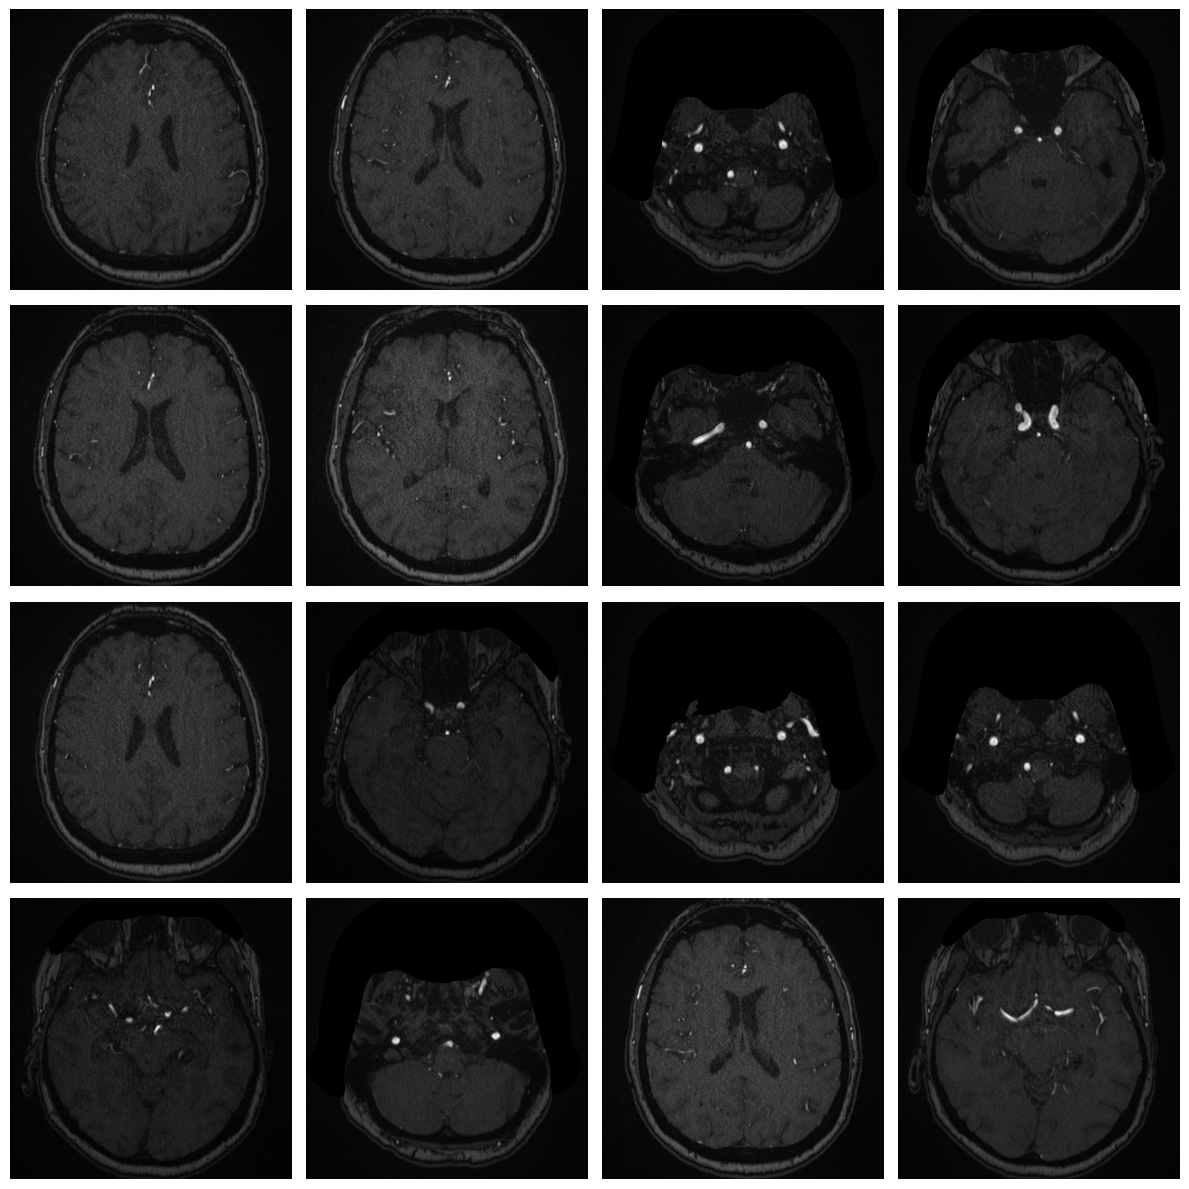

In [5]:
# Take the id of the serie from the train csv
example_id = train_df.iloc[0]['SeriesInstanceUID']
print("Series ID:", example_id)

# Path of the folder with the DICOM series
dicom_dir = os.path.join(base_dir, "series", example_id)

# List of files on the DICOM folder
dicom_files = sorted(os.listdir(dicom_dir))[:16]  # prendi i primi 12 file
print("Files:", dicom_files)

# Create a 4x4 grid figure
fig, axes = plt.subplots(4, 4, figsize=(12, 12))
axes = axes.flatten() 

for i in range(16):
    ax = axes[i]
    if i < len(dicom_files):
        file_path = os.path.join(dicom_dir, dicom_files[i])
        dcm = pydicom.dcmread(file_path)
        ax.imshow(dcm.pixel_array, cmap="gray")
    ax.axis("off") 

plt.tight_layout()
plt.show()